In [12]:
import torch
import matplotlib.pyplot as plt
import irsa
import glob
import numpy as np

torch.cuda.is_available()

True

### Load and Prepare Data

In [18]:
# Paths to experimental data
exp_paths = sorted(glob.glob('data/DX/*.DX'))

# Paths to predicted data
pred_paths = sorted(glob.glob('/qfs/projects/cryo_ir/nist/dft_under10conf/**/*.pkl'))

In [3]:
# Load single experimental data instance
x_exp, y_exp = irsa.io.load_experimental(exp_paths[0])

In [4]:
# Load single predicted data instance
x_pred_raw, y_pred_raw = irsa.io.load_predicted(pred_paths[0])

In [5]:
# Process predicted
x_pred, y_pred = irsa.io.preprocess_predicted(x_pred_raw, y_pred_raw, x_exp, sigma=2)

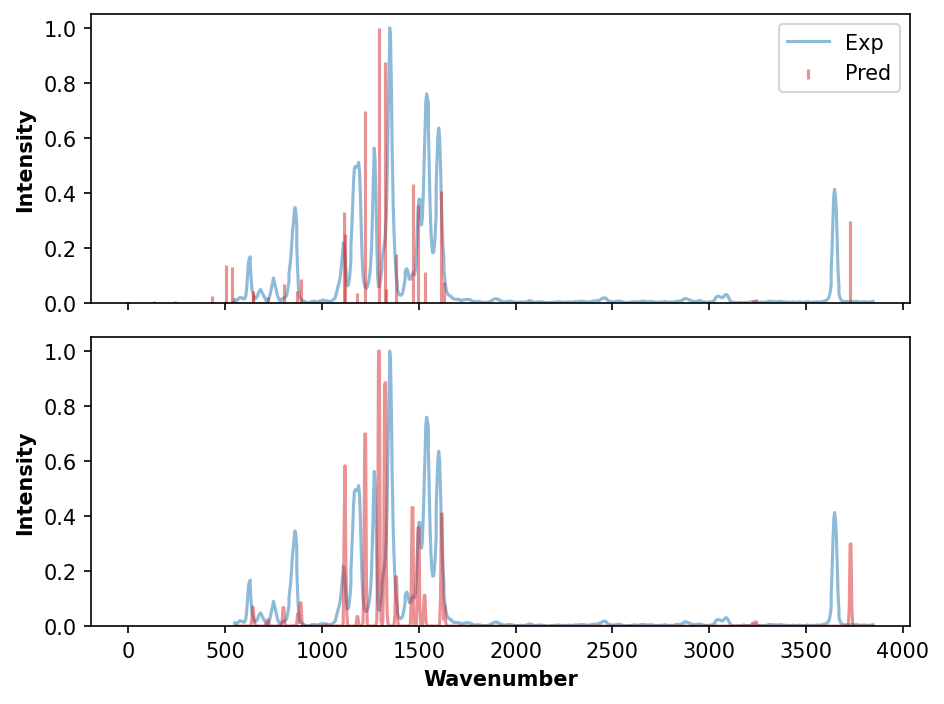

In [6]:
fig, ax = plt.subplots(2, dpi=150, facecolor='w', sharex=True, sharey=True)

# Plot experimental
ax[0].plot(x_exp, y_exp / y_exp.max(), c='C0', label='Exp', alpha=0.5)
ax[1].plot(x_exp, y_exp / y_exp.max(), c='C0', label='Exp', alpha=0.5)


# Plot raw prediction
_, stemlines, _ = ax[0].stem(x_pred_raw, y_pred_raw / y_pred_raw.max(),
                             markerfmt=" ",
                             basefmt=" ",
                             linefmt="C3-",
                             use_line_collection=True,
                             label='Pred')
plt.setp(stemlines, 'alpha', 0.5)

# Plot processed prediction
ax[1].plot(x_pred, y_pred / y_pred.max(), c='C3', label='Pred', alpha=0.5)

# Limits
ax[0].set_ylim(0, None)

# Axis labels
ax[0].set_ylabel('Intensity', fontweight='bold')
ax[1].set_xlabel('Wavenumber', fontweight='bold')
ax[1].set_ylabel('Intensity', fontweight='bold')

# Legend
ax[0].legend()

plt.tight_layout()
plt.show()

### Load Model

In [7]:
# Load model
model = irsa.io.load_model('model/ir_exp_pred_pnn_0.1757.pt', embedding_dim=2048)
model

PairedNeuralNet(
  (domain_embed1): DomainEncoder(
    (conv1): Conv1d(1, 32, kernel_size=(21,), stride=(1,), padding=same)
    (conv2): Conv1d(32, 32, kernel_size=(21,), stride=(1,), padding=same)
    (conv3): Conv1d(32, 64, kernel_size=(21,), stride=(1,), padding=same)
    (conv4): Conv1d(64, 64, kernel_size=(21,), stride=(1,), padding=same)
    (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc_out): Linear(in_features=3264, out_features=2048, bias=True)
  )
  (domain_embed2): DomainEncoder(
    (conv1): Conv1d(1, 32, kernel_size=(21,), stride=(1,), padding=same)
    (conv2): Conv1d(32, 32, kernel_size=(21,), stride=(1,), padding=same)
    (conv3): Conv1d(32, 64, kernel_s

### Predict

In [8]:
irsa.predict.predict(model, y_exp, y_pred)

array([0.99995506], dtype=float32)

### More than one comparison

In [19]:
# Experimental
x_exp, y_exp = zip(*[irsa.io.load_experimental(x) for x in exp_paths[:100]])
x_exp = np.array(x_exp)
y_exp = np.array(y_exp)

In [20]:
# Predicted
x_pred, y_pred = zip(*[irsa.io.preprocess_predicted(*irsa.io.load_predicted(x), x_exp[0]) for x in pred_paths[:100]])
x_pred = np.array(x_pred)
y_pred = np.array(y_pred)

In [21]:
irsa.predict.predict(model, y_exp, y_pred)

array([9.98715878e-01, 9.99961257e-01, 8.05124164e-01, 2.83133658e-03,
       5.09623169e-06, 1.73197100e-06, 9.99685526e-01, 1.96168621e-04,
       4.47442057e-04, 8.02679278e-06, 4.69562224e-07, 5.04134259e-05,
       6.25733321e-07, 5.60668650e-06, 3.56422141e-02, 4.65421326e-04,
       2.02869391e-03, 3.01517343e-06, 3.65227720e-07, 6.11377686e-08,
       1.19881440e-06, 3.43599617e-01, 1.61735285e-02, 5.78778327e-07,
       3.71149153e-01, 1.57151022e-03, 8.28673365e-05, 1.43781293e-03,
       2.97027273e-05, 3.69805425e-01, 1.41901939e-04, 6.47961974e-01,
       4.82831821e-02, 1.41528547e-01, 7.23487290e-07, 1.24725675e-05,
       1.03870351e-02, 8.09177533e-02, 3.51061864e-08, 2.60172305e-06,
       1.00584212e-03, 1.46003149e-05, 2.41527755e-06, 1.70100422e-03,
       8.38411099e-04, 6.15208119e-05, 8.95332396e-02, 5.66744924e-01,
       6.33308897e-04, 2.71203872e-02, 5.56705929e-02, 8.25917125e-01,
       9.62753892e-02, 6.67654335e-01, 4.72425343e-03, 9.42284714e-06,
      

### From already processed data

In [22]:
exp = np.load('data/exp.npy')
pred = np.load('data/pred.npy')
exp_labels = np.load('data/exp_labels.npy')
pred_labels = np.load('data/pred_labels.npy')

In [23]:
irsa.predict.predict(model, exp[:100], pred[:100])

array([9.9806887e-01, 9.8847932e-01, 9.7819775e-01, 1.1839760e-04,
       1.8524046e-05, 9.9987423e-01, 2.0489060e-05, 1.6157774e-08,
       2.6285807e-03, 2.5301302e-04, 1.4667533e-02, 6.6556209e-01,
       1.1246317e-09, 1.1485731e-07, 5.8699306e-04, 2.0577816e-02,
       1.9643754e-03, 1.4899313e-05, 1.8422359e-05, 7.5439243e-03,
       1.7297349e-05, 5.1432671e-03, 2.3997613e-06, 1.4830708e-04,
       1.5003191e-07, 1.7636169e-02, 9.3209529e-03, 1.5387259e-02,
       3.6595590e-02, 6.2160776e-05, 1.0429835e-06, 7.5525844e-05,
       3.1944439e-01, 2.7835724e-05, 1.5231686e-06, 9.3302197e-07,
       6.6279041e-05, 1.8409251e-01, 7.8748119e-11, 1.8406306e-06,
       1.3092839e-03, 2.4196327e-06, 1.9472660e-04, 1.8026882e-04,
       5.7782349e-04, 1.5409833e-01, 2.3946088e-02, 4.1309467e-01,
       7.2982555e-05, 5.8766623e-04, 1.5705214e-06, 7.1283258e-02,
       3.5826121e-02, 4.3652490e-01, 1.0370320e-04, 8.2009058e-07,
       5.0271320e-04, 1.0014056e-03, 3.4454702e-03, 7.7238502e